# Theory Questions

**Q1. What is a Decision Tree, and how does it work?**

--> A Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks. It works like a flowchart, where:

Each internal node represents a decision based on a feature.

Each branch represents the outcome of a decision.

Each leaf node represents the final output label or value.

The algorithm splits the data into subsets based on feature values in such a way that the resulting subsets are as pure as possible (i.e., mostly contain a single class). This is done recursively, forming a tree structure.

**Q2. What are impurity measures in Decision Trees?**

--> Impurity measures determine how mixed the classes are in a dataset. A node is "pure" if all samples belong to the same class. The most common impurity measures are:

Gini Impurity

Entropy (Information Gain)

These are used to decide the best feature and value for splitting the dataset at each step.

**Q3. What is the mathematical formula for Gini Impurity?**

--> The Gini Impurity for a dataset is calculated using the formula:

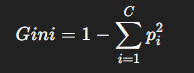

Where:

𝐶
= number of classes

𝑝
𝑖
​
  = probability of class
𝑖
in the node

If a node is pure (contains only one class), the Gini Impurity is 0.

**Q4. What is the mathematical formula for Entropy?**

--> The Entropy of a dataset is given by:

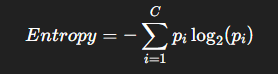

Where:

𝐶
 = number of classes

𝑝
𝑖
​
  = probability of class
𝑖
in the node

A higher entropy means the node is more impure.

**Q5. What is Information Gain, and how is it used in Decision Trees?**

--> Information Gain (IG) is the reduction in entropy after a dataset is split on a feature. It tells us how much "information" a feature gives us about the class. It is calculated as:

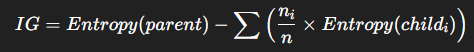

Where:

𝑛
𝑖
​
  = number of samples in the child node

𝑛
= total number of samples in the parent node

The feature with the highest Information Gain is chosen for splitting.

**Q6. What is the difference between Gini Impurity and Entropy?**

--> Both measure node impurity.

Gini Impurity is faster to compute and often used in practice.

Entropy is based on information theory and provides a clearer theoretical foundation.

Results are usually similar, but they may produce different trees depending on the dataset.

**Q7. What is the mathematical explanation behind Decision Trees?**

--> Mathematically, decision trees build a model by:

Selecting the best feature to split the data based on a criterion (Gini or Entropy).

Recursively splitting the data until a stopping condition is met (like max depth or minimum samples).

Using impurity measures and gain/loss functions to evaluate splits.

The model maps features
𝑋
to output
𝑌
using a series of if-else rules.

**Q8. What is Pre-Pruning in Decision Trees?**

--> Pre-pruning (early stopping) stops the tree from growing once a certain condition is met, such as:

Maximum depth

Minimum number of samples required to split

Minimum gain in impurity

It helps prevent overfitting by limiting the tree's complexity during construction.

**Q9. What is Post-Pruning in Decision Trees?**

--> Post-pruning (also called cost complexity pruning) allows the tree to grow fully and then removes nodes that do not improve performance. This is done using:

Validation data to evaluate performance

Pruning back nodes that have low importance

It helps in simplifying the model after training.

**Q10. What is the difference between Pre-Pruning and Post-Pruning?**

--> pre-pruning limits tree growth during construction by setting constraints like maximum depth or minimum information gain, while post-pruning allows the tree to grow fully and then removes branches deemed unnecessary based on a cost-complexity parameter

**Q11. What is a Decision Tree Regressor?**

--> A Decision Tree Regressor is a version of the decision tree used for predicting continuous numerical values instead of categories. Instead of class labels, it outputs the mean value of target values in a leaf node. The splits are made to minimize variance or Mean Squared Error (MSE) in regression tasks.

**Q12. What are the advantages and disadvantages of Decision Trees?**

--> Advantages:

Easy to understand and visualize.

No need for feature scaling.

Can handle both numerical and categorical data.

Fast inference.

Disadvantages:

Prone to overfitting.

Unstable with small changes in data.

Can create biased trees if some classes dominate.

**Q13. How does a Decision Tree handle missing values?**

--> Some decision tree algorithms like CART or C4.5 handle missing values by:

Using surrogate splits (backup rules when main feature is missing).

Ignoring missing values during splitting.

Splitting samples with missing values across all branches with weights.

However, scikit-learn’s default DecisionTreeClassifier does not handle missing values directly—you must fill or drop them.

**Q14. How does a Decision Tree handle categorical features?**

--> Decision Trees can handle categorical features by creating branches for each category.

Some implementations automatically encode categories; others require one-hot encoding before training.

scikit-learn’s default trees require encoding since they treat all input as numerical.

**Q15. What are some real-world applications of Decision Trees?**

--> Applications include:

Medical diagnosis: Predicting diseases from symptoms (e.g., breast cancer diagnosis).

Credit scoring: Classifying loan applicants as high/low risk.

Customer segmentation: Dividing customers based on behavior.

Fraud detection: Spotting unusual transactions.

Manufacturing: Identifying faulty products on the assembly line.

# Practical Questions

In [1]:
#16. Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 1.0


In [2]:
#17. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

print("Feature Importances:", clf.feature_importances_)

Feature Importances: [0.01667014 0.         0.40593501 0.57739485]


In [3]:
#18. Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 1.0


In [4]:
#19. Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE)
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 0.5012994821067345


In [9]:
#20. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Export tree to dot format
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True)

# Visualize tree
graph = graphviz.Source(dot_data)
graph.render("iris_tree", format = 'pdf')  # This saves the tree as a PDF file: iris_tree.pdf
graph.view()               # Opens the tree PDF (optional)

'iris_tree.pdf'

In [10]:
#21. Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree
clf_limited = DecisionTreeClassifier(max_depth=3)
clf_limited.fit(X_train, y_train)
acc_limited = accuracy_score(y_test, clf_limited.predict(X_test))

clf_full = DecisionTreeClassifier()
clf_full.fit(X_train, y_train)
acc_full = accuracy_score(y_test, clf_full.predict(X_test))

print("Accuracy with max_depth=3:", acc_limited)
print("Accuracy with full tree:", acc_full)

Accuracy with max_depth=3: 1.0
Accuracy with full tree: 1.0


In [11]:
#22. Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree
clf_custom = DecisionTreeClassifier(min_samples_split=5)
clf_custom.fit(X_train, y_train)
acc_custom = accuracy_score(y_test, clf_custom.predict(X_test))

clf_default = DecisionTreeClassifier()
clf_default.fit(X_train, y_train)
acc_default = accuracy_score(y_test, clf_default.predict(X_test))

print("Accuracy with min_samples_split=5:", acc_custom)
print("Accuracy with default tree:", acc_default)

Accuracy with min_samples_split=5: 1.0
Accuracy with default tree: 1.0


In [12]:
#23. Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

clf_scaled = DecisionTreeClassifier()
clf_scaled.fit(X_train_s, y_train_s)
acc_scaled = accuracy_score(y_test_s, clf_scaled.predict(X_test_s))

clf_unscaled = DecisionTreeClassifier()
clf_unscaled.fit(X_train, y_train)
acc_unscaled = accuracy_score(y_test, clf_unscaled.predict(X_test))

print("Accuracy with scaled data:", acc_scaled)
print("Accuracy with unscaled data:", acc_unscaled)

Accuracy with scaled data: 1.0
Accuracy with unscaled data: 1.0


In [13]:
#24. Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification
from sklearn.multiclass import OneVsRestClassifier

ovr_model = OneVsRestClassifier(DecisionTreeClassifier())
ovr_model.fit(X_train, y_train)

print("OvR Accuracy:", accuracy_score(y_test, ovr_model.predict(X_test)))

OvR Accuracy: 1.0


In [14]:
#25. Write a Python program to train a Decision Tree Classifier and display the feature importance scores
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

for name, importance in zip(iris.feature_names, clf.feature_importances_):
    print(f"{name}: {importance:.4f}")

sepal length (cm): 0.0179
sepal width (cm): 0.0000
petal length (cm): 0.8997
petal width (cm): 0.0824


In [15]:
#26. Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree
reg_limited = DecisionTreeRegressor(max_depth=5)
reg_limited.fit(X_train, y_train)
mse_limited = mean_squared_error(y_test, reg_limited.predict(X_test))

reg_full = DecisionTreeRegressor()
reg_full.fit(X_train, y_train)
mse_full = mean_squared_error(y_test, reg_full.predict(X_test))

print("MSE with max_depth=5:", mse_limited)
print("MSE with full tree:", mse_full)

MSE with max_depth=5: 0.0
MSE with full tree: 0.0


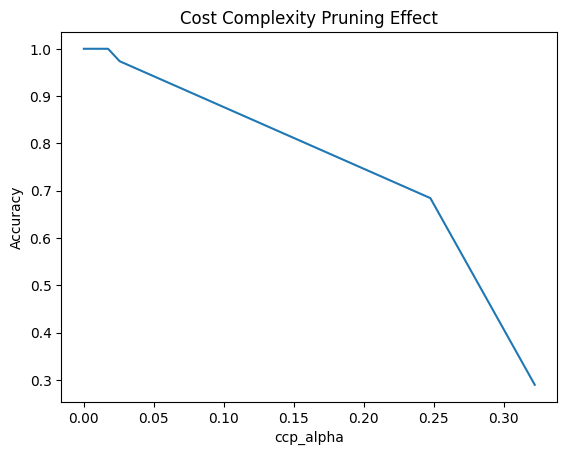

In [16]:
#27. Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy
path = DecisionTreeClassifier().cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

acc_scores = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    acc_scores.append(acc)

import matplotlib.pyplot as plt
plt.plot(ccp_alphas, acc_scores)
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Cost Complexity Pruning Effect")
plt.show()

In [17]:
#28. Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score
from sklearn.metrics import precision_score, recall_score, f1_score

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


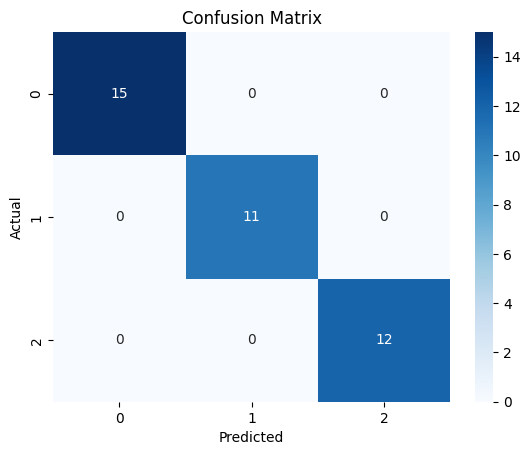

In [18]:
#29. Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [19]:
#30. Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best Parameters: {'max_depth': 4, 'min_samples_split': 2}
Best Accuracy: 0.9280632411067196
